<a href="https://colab.research.google.com/github/sid781/Sales-prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [192]:
train = df_train.copy()
test = df_test.copy()

In [193]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [194]:
outlet = ['Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type']
item = ['Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP']

In [195]:
train = train.set_index(['Outlet_Identifier','Item_Identifier']).reset_index()
test = test.set_index(['Outlet_Identifier','Item_Identifier']).reset_index()

In [196]:
train.isna().sum()

Outlet_Identifier               0
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [197]:
test.isna().sum()

Outlet_Identifier               0
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [198]:
train = train.drop(['Item_Weight', "Item_Type", 'Outlet_Size'], axis=1)
test = test.drop(['Item_Weight',"Item_Type", 'Outlet_Size'], axis=1)

In [199]:
train.head()

,Outlet_Identifier,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,FDA15,Low Fat,0.016047,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,OUT018,DRC01,Regular,0.019278,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,OUT049,FDN15,Low Fat,0.016760,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,OUT010,FDX07,Regular,0.000000,182.0950,1998,Tier 3,Grocery Store,732.3800
4,OUT013,NCD19,Low Fat,0.000000,53.8614,1987,Tier 3,Supermarket Type1,994.7052


In [200]:
num = train.select_dtypes(exclude=['object']).columns[:-1]
train[num].head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.016047,249.8092,1999
1,0.019278,48.2692,2009
2,0.016760,141.6180,1999
3,0.000000,182.0950,1998
4,0.000000,53.8614,1987


In [201]:
cat = train.select_dtypes(include=['object']).columns[2:]
train[cat].head()

,Item_Fat_Content,Outlet_Location_Type,Outlet_Type
0,Low Fat,Tier 1,Supermarket Type1
1,Regular,Tier 3,Supermarket Type2
2,Low Fat,Tier 1,Supermarket Type1
3,Regular,Tier 3,Grocery Store
4,Low Fat,Tier 3,Supermarket Type1


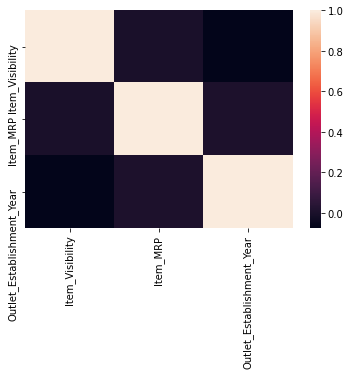

In [202]:
sns.heatmap(train[num].corr())

In [203]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [204]:
for i in cat:
  print(train[i].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [340]:
X_train= train.iloc[:,2:-1].values
y_train = train.iloc[:,-1].values
X_test = test.iloc[:,2:].values

In [226]:
#from sklearn.model_selection import train_test_split
#X_train , X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [341]:
X_train.shape

(8523, 6)

In [342]:
X_test.shape

(5681, 6)

In [343]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot = OneHotEncoder()

ct = ColumnTransformer([('encoder', onehot, [0, -2, -1])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
#X_val = np.array(ct.transform(X_val))
X_test = np.array(ct.transform(X_test))

In [344]:
X_train.shape, X_test.shape

((8523, 15), (5681, 15))

In [345]:
y_train

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [346]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train[:,-3:] = sc.fit_transform(X_train[:,-3:])
#X_val[:,-3:] = sc.transform(X_val[:,-3:])
X_test[:,-3:] = sc.transform(X_test[:,-3:])
#y_train = sc2.fit_transform(y_train.reshape(1,-1))

In [347]:
X_train

array([[0.0, 1.0, 0.0, ..., -0.9707321742340496, 1.7474538105000454,
        0.13954076129513368],
       [0.0, 0.0, 1.0, ..., -0.908111226056839, -1.4890232521574376,
        1.334102742530897],
       [0.0, 1.0, 0.0, ..., -0.9569173311583069, 0.010040209322173647,
        0.13954076129513368],
       ...,
       [0.0, 1.0, 0.0, ..., -0.5997844864938314, -0.8972075506315431,
        0.7368217519130154],
       [0.0, 0.0, 1.0, ..., 1.5328797570986958, -0.6079769210785442,
        1.334102742530897],
       [0.0, 1.0, 0.0, ..., -0.41193590696696114, -1.0522610419026708,
        -0.09937163495201898]], dtype=object)

In [348]:
y_train

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [349]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [351]:
y_pred = regressor.predict(X_test)
y_pred

array([1796.98486328, 1436.76855469, 1928.51074219, ..., 1941.38476562,
       3530.4921875 , 1385.77929688])

In [352]:
regressor.intercept_

-2668951041912.356

In [353]:
regressor.coef_

array([-8.48278185e+14, -8.48278185e+14, -8.48278185e+14, -8.48278185e+14,
       -8.48278185e+14,  5.47896137e+15,  5.47896137e+15,  5.47896137e+15,
       -4.62801423e+15, -4.62801423e+15, -4.62801423e+15, -4.62801423e+15,
       -1.39062500e+01,  9.69210938e+02,  3.01679688e+01])

In [375]:
from sklearn.linear_model import Lasso
regressor1= Lasso(alpha=5.0)
regressor1.fit(X_train, y_train)

Lasso(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [376]:
y_pred1 = regressor1.predict(X_test)
y_pred1

array([1793.53034373, 1469.32719713, 1939.0921044 , ..., 1946.40540371,
       3485.07408705, 1370.51881   ])

In [377]:
regressor1.intercept_

2290.8022382936256

In [378]:
regressor1.coef_

array([   -0.        ,    -0.        ,    35.20781147,     0.        ,
          -0.        ,    -0.        ,     1.92555813,    -0.        ,
       -1902.41054779,     0.        ,  -273.19740201,  1361.90128239,
         -13.67001866,   963.82583997,     0.        ])

In [379]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor1, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

In [380]:
score=abs(score)**0.5
score.mean()

1130.2444194162886

In [383]:
test['Item_Outlet_Sales']=y_pred1
sub = test.loc[:, ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]

In [385]:
sub.to_csv('submission.csv')